## Clean Dataframes with E-Ladestation Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_els = pd.read_csv("../data/ladestationen_MUC_georg.csv")
df_els["aufstelldatum"] = pd.to_datetime(df_els["aufstelldatum"])
df_els.head(3)

,FID,anzahl_els,anzahl_lp_ac,anzahl_lp_alle,anzahl_lp_dc,anzahl_stpl,aufstelldatum,bemerkung,stadtbezirk,standort,haupttyp,haupttyp_bedeutung,shape
0,opendata_ruhver_els_point.1,1,2,2,0,2,2017-05-29,NaN,6,Urbanstr. 2,0,In Betrieb befindliche Ladesäulen,POINT (689684.126600797 5331783.312798096)
1,opendata_ruhver_els_point.2,1,2,2,0,2,2017-10-12,NaN,6,Urbanstr. 6,0,In Betrieb befindliche Ladesäulen,POINT (689751.0750007983 5331777.291698092)
2,opendata_ruhver_els_point.3,2,4,4,0,4,2017-09-14,NaN,18,Reginfriedstr. 2,0,In Betrieb befindliche Ladesäulen,POINT (691870.9652008448 5331775.829797959)


In [26]:
df_els_bezirk = df_els.groupby("stadtbezirk")["anzahl_stpl"].sum()
df_els_bezirk
#.plot(kind="bar")

stadtbezirk
1      62
2      52
3      65
4      70
5      56
6      32
7      38
8      24
9     114
10     28
11     28
12    106
13     52
14     22
15     36
16     60
17     32
18     48
19     60
20     28
21     60
22     26
23      8
24     12
25     54
Name: anzahl_stpl, dtype: int64

In [4]:
df_bna = pd.read_csv("../data/ladestationen_BNA_georg.csv")
df_bna["Standort"] = df_bna["Straße"] + " " + df_bna["Hausnummer"]
df_bna["Inbetriebnahmedatum"] = pd.to_datetime(df_bna["Inbetriebnahmedatum"])

C:\Users\gammer\AppData\Local\Temp\ipykernel_9544\267833157.py:3: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_bna["Inbetriebnahmedatum"] = pd.to_datetime(df_bna["Inbetriebnahmedatum"])


In [5]:
df_bna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619 entries, 0 to 1618
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Betreiber                          1619 non-null   object        
 1   Straße                             1619 non-null   object        
 2   Hausnummer                         1619 non-null   object        
 3   Adresszusatz                       99 non-null     object        
 4   Postleitzahl                       1619 non-null   int64         
 5   Ort                                1619 non-null   object        
 6   Bundesland                         1619 non-null   object        
 7   Kreis/kreisfreie Stadt             1619 non-null   object        
 8   Breitengrad                        1619 non-null   object        
 9   Längengrad                         1619 non-null   object        
 10  Inbetriebnahmedatum                1

In [6]:
df_bna_red = df_bna[["Inbetriebnahmedatum", "Standort", "Anzahl Ladepunkte", 
                     "Betreiber", "Postleitzahl", "Breitengrad", "Längengrad"]]

df_bna_red = df_bna_red.rename(columns={"Inbetriebnahmedatum":"Datum", "Anzahl Ladepunkte":"Ladepunkte"})

In [7]:
df_els_red = df_els[["aufstelldatum", "standort", "anzahl_stpl", "stadtbezirk", "shape"]]

df_els_red = df_els_red.rename(columns={"anzahl_stpl":"Ladepunkte", "aufstelldatum":"Datum", "stadtbezirk":"Bezirk",
                                       "standort":"Standort"})

In [8]:
df_bna_red.sort_values("Standort").head(5)

,Datum,Standort,Ladepunkte,Betreiber,Postleitzahl,Breitengrad,Längengrad
406,2020-07-07,Adalbertstraße 82,3,Qwello GmbH,80799,"48,153788","11,573262"
1448,2019-05-09,Adam-Berg-Str. 24,2,SWM Versorgungs GmbH,81735,"48,11371","11,622677"
225,2019-10-16,Agnes-Bernauer-Pl. 8,2,SWM Versorgungs GmbH,80687,"48,140193","11,49647"
226,2019-10-16,Agnes-Bernauer-Pl. 8a,2,SWM Versorgungs GmbH,80687,"48,140208","11,49631"
1107,2018-04-12,Agnes-Pockels-Bogen 1,2,SWM Versorgungs GmbH,80992,"48,173258","11,532358"


In [9]:
df_els_red.sort_values("Standort").head(5)

,Datum,Standort,Ladepunkte,Bezirk,shape
105,2019-04-17,Adam-Berg-Str. 24,4,16,POINT (695197.4377009186 5332245.63149773)
138,2019-09-04,Agnes-Bernauer-Platz 8,4,25,POINT (685710.6557007167 5334898.457198311)
186,2018-04-05,Agnes-Pockels-Bogen 1,2,10,POINT (688265.6010007665 5338656.678198167)
133,2018-12-05,Aindorferstr. 135,4,25,POINT (685594.1170007145 5334010.582798319)
129,2018-12-05,Aindorferstr. 91a,4,25,POINT (686003.9546007224 5333899.750998299)


In [10]:
df_bna_red[df_bna_red["Betreiber"] == "SWM Versorgungs GmbH"]

,Datum,Standort,Ladepunkte,Betreiber,Postleitzahl,Breitengrad,Längengrad
0,2020-01-31,Karl-Hromadnik-Str. 2,2,SWM Versorgungs GmbH,80241,"48,137018","11,456796"
1,2018-12-07,Peter-Kreuder-Str. 5,2,SWM Versorgungs GmbH,80245,"48,159746","11,445709"
2,2018-12-07,Peter-Kreuder-Str. 5a,2,SWM Versorgungs GmbH,80245,"48,159701","11,445643"
3,2018-12-11,Wiesentfelser Str. 16,2,SWM Versorgungs GmbH,80249,"48,147492","11,419531"
12,2017-12-19,Westenriederstr. 39,2,SWM Versorgungs GmbH,80331,"48,135012","11,579745"
...,...,...,...,...,...,...,...
1607,2017-08-07,Robert-Heger-Str. 22,2,SWM Versorgungs GmbH,81927,"48,158571","11,642595"
1608,2019-11-18,Meistersingerstr. 118,2,SWM Versorgungs GmbH,81927,"48,157852","11,637345"
1609,2020-01-13,Schnorr-von-Carolsfeld-Str. 17,2,SWM Versorgungs GmbH,81927,"48,15734","11,646599"
1612,2018-12-07,Marienburger Str. 1,2,SWM Versorgungs GmbH,81929,"48,119093","11,674363"


In [11]:
df_bna_red_ind = df_bna_red.set_index(df_bna_red["Datum"])

In [12]:
df_bna_LP_month = df_bna_red_ind.groupby([(df_bna_red_ind.Datum.index.year
                                          ), (df_bna_red_ind.Datum.index.month)])['Ladepunkte'].sum()

In [13]:
df_bna_LP_month

Datum  Datum
2015   7         4
       12        7
2016   5         2
       9         2
       11        3
                ..
2023   7         9
       9        13
       11       23
       12       20
2024   1         5
Name: Ladepunkte, Length: 79, dtype: int64

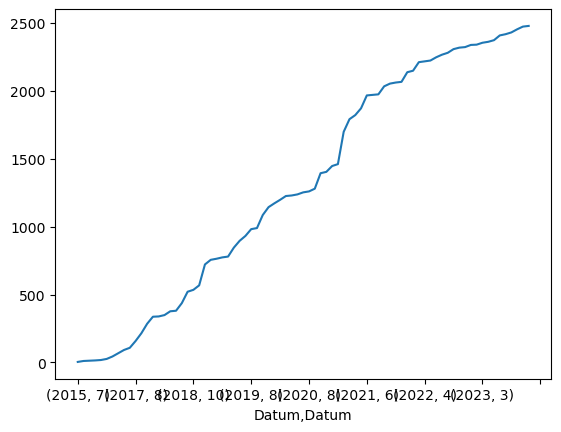

In [14]:
df_bna_LP_month.cumsum().plot()
plt.show()

In [15]:
df_bna_red.head()

,Datum,Standort,Ladepunkte,Betreiber,Postleitzahl,Breitengrad,Längengrad
0,2020-01-31,Karl-Hromadnik-Str. 2,2,SWM Versorgungs GmbH,80241,"48,137018","11,456796"
1,2018-12-07,Peter-Kreuder-Str. 5,2,SWM Versorgungs GmbH,80245,"48,159746","11,445709"
2,2018-12-07,Peter-Kreuder-Str. 5a,2,SWM Versorgungs GmbH,80245,"48,159701","11,445643"
3,2018-12-11,Wiesentfelser Str. 16,2,SWM Versorgungs GmbH,80249,"48,147492","11,419531"
4,2022-01-13,Sparkassen Str. 2-4,1,Stadtsparkasse München AdöR,80331,"48,1368071","11,5778407"


In [16]:
df_BNA_dat = df_bna_red.groupby("Datum")["Ladepunkte"].sum().reset_index()
df_BNA_dat

,Datum,Ladepunkte
0,2015-07-01,4
1,2015-12-04,7
2,2016-05-31,2
3,2016-09-14,2
4,2016-11-30,3
...,...,...
268,2023-12-22,2
269,2023-12-23,4
270,2023-12-29,2
271,2024-01-01,3


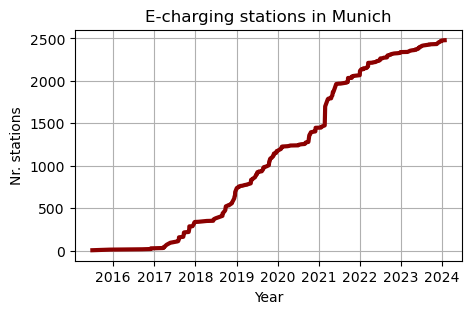

In [17]:
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(df_BNA_dat["Datum"], df_BNA_dat["Ladepunkte"].cumsum(), linewidth=3, color="darkred")
ax.set_title("E-charging stations in Munich")
ax.set_ylabel("Nr. stations")
ax.set_xlabel("Year")
plt.grid()
plt.savefig('E-charg_MUC.png', bbox_inches='tight')
plt.show()

In [18]:
df_els_date = df_els_red.set_index(df_els_red["Datum"])
df_els_LP_month = df_els_date.groupby([(df_els_date.Datum.index.year
                                          ), (df_els_date.Datum.index.month)])['Ladepunkte'].sum()

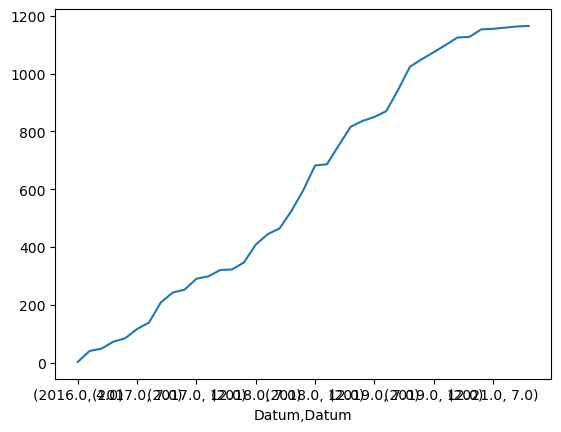

In [19]:
df_els_LP_month.cumsum().plot()
plt.show()

In [30]:
df_bez = pd.read_csv("../data/MUC_Bezirke_Einwohner_georg.csv")

In [31]:
df_bez.head(26)

,Bezirk,Bezirksname,Fläche,Einwohner,Dichte
0,1,Altstadt-Lehel,3.15,20.860,6.631
1,2,Ludwigsvorstadt-Isarvorstadt,4.40,49.876,11.331
2,3,Maxvorstadt,4.30,51.945,12.085
3,4,Schwabing-West,4.36,68.254,15.643
4,5,Au-Haidhausen,4.22,63.583,15.067
5,6,Sendling,3.94,40.790,10.356
6,7,Sendling-Westpark,7.81,62.065,7.942
7,8,Schwanthalerhöhe,2.07,28.732,13.878
8,9,Neuhausen-Nymphenburg,12.91,100.396,7.774
9,10,Moosach,11.09,55.851,5.034


In [29]:
df_els_red_bez = df_els_red.groupby("Bezirk")["Ladepunkte"].sum().reset_index()
df_els_red_bez

,Bezirk,Ladepunkte
0,1,62
1,2,52
2,3,65
3,4,70
4,5,56
5,6,32
6,7,38
7,8,24
8,9,114
9,10,28


In [47]:
df_els_merge = pd.merge(df_els_red_bez,df_bez, how="outer")
df_els_merge["Punkte_tsd_Einw"] = df_els_merge["Ladepunkte"] / df_els_merge["Einwohner"]
df_els_merge["Punkte_Fläche"] = df_els_merge["Ladepunkte"] / df_els_merge["Fläche"]
df_els_merge["Punkte_Dichte"] = df_els_merge["Ladepunkte"] / df_els_merge["Dichte"]
df_els_merge.sort_values("Punkte_Fläche", ascending=False)

,Bezirk,Ladepunkte,Bezirksname,Fläche,Einwohner,Dichte,Punkte_tsd_Einw,Punkte_Fläche,Punkte_Dichte
0,1,62,Altstadt-Lehel,3.15,20.860,6.631,2.972196,19.682540,9.350023
3,4,70,Schwabing-West,4.36,68.254,15.643,1.025581,16.055046,4.474845
2,3,65,Maxvorstadt,4.30,51.945,12.085,1.251324,15.116279,5.378568
4,5,56,Au-Haidhausen,4.22,63.583,15.067,0.880739,13.270142,3.716732
1,2,52,Ludwigsvorstadt-Isarvorstadt,4.40,49.876,11.331,1.042586,11.818182,4.589180
7,8,24,Schwanthalerhöhe,2.07,28.732,13.878,0.835306,11.594203,1.729356
24,25,54,Laim,5.29,56.716,10.729,0.952112,10.207940,5.033088
8,9,114,Neuhausen-Nymphenburg,12.91,100.396,7.774,1.135503,8.830364,14.664266
5,6,32,Sendling,3.94,40.790,10.356,0.784506,8.121827,3.089996
17,18,48,Untergiesing-Harlaching,8.06,53.909,6.691,0.890389,5.955335,7.173816


In [77]:
df_els_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bezirk           25 non-null     int64  
 1   Ladepunkte       25 non-null     int64  
 2   Bezirksname      25 non-null     object 
 3   Fläche           25 non-null     float64
 4   Einwohner        25 non-null     float64
 5   Dichte           25 non-null     float64
 6   Punkte_tsd_Einw  25 non-null     float64
 7   Punkte_Fläche    25 non-null     float64
 8   Punkte_Dichte    25 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.9+ KB


C:\Users\gammer\AppData\Local\Temp\ipykernel_9544\516581471.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt. tight_layout()


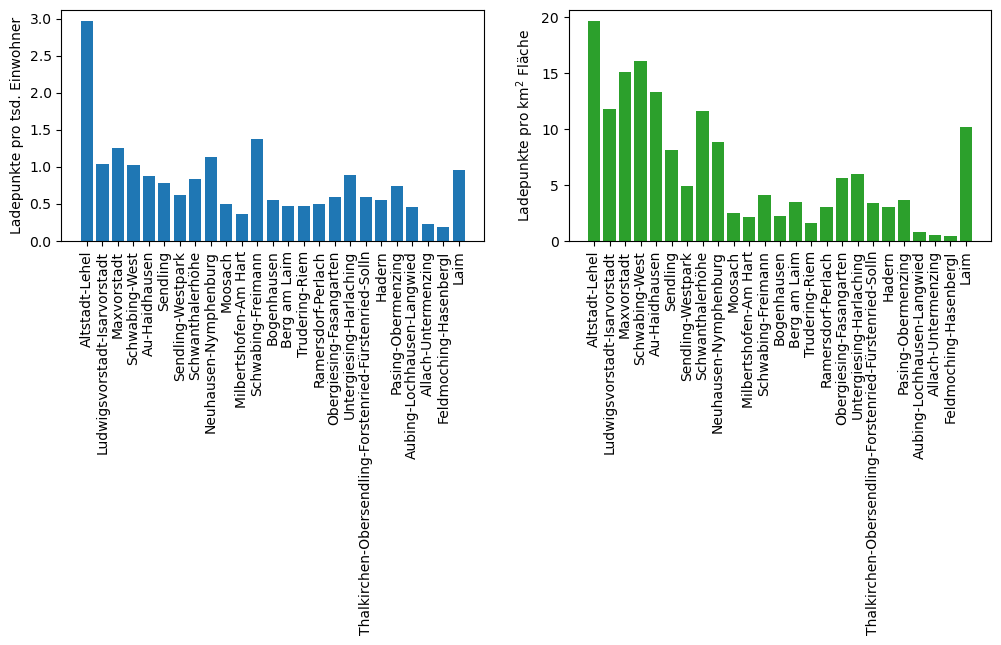

In [65]:
fig, ax = plt.subplots(1,2,figsize=(12,3))
ax[0].bar(df_els_merge["Bezirksname"], df_els_merge["Punkte_tsd_Einw"])
ax[1].bar(df_els_merge["Bezirksname"], df_els_merge["Punkte_Fläche"], color="C2")
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_ylabel("Ladepunkte pro tsd. Einwohner")
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_ylabel("Ladepunkte pro km$^2$ Fläche")
plt. tight_layout()
plt.show()

In [72]:
df_BNA_bez = pd.read_csv("../data/Ladesaeulenregister_mit_Bezirk.csv")
df_BNA_bez.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619 entries, 0 to 1618
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Betreiber                          1619 non-null   object 
 1   Straße                             1619 non-null   object 
 2   Hausnummer                         1619 non-null   object 
 3   Adresszusatz                       99 non-null     object 
 4   Postleitzahl                       1619 non-null   int64  
 5   Ort                                1619 non-null   object 
 6   Bundesland                         1619 non-null   object 
 7   Kreis/kreisfreie Stadt             1619 non-null   object 
 8   Breitengrad                        1619 non-null   object 
 9   Längengrad                         1619 non-null   object 
 10  Inbetriebnahmedatum                1619 non-null   object 
 11  Nennleistung Ladeeinrichtung [kW]  1619 non-null   objec

In [74]:
df_BNA_bez_red = df_BNA_bez[["Inbetriebnahmedatum", "Stadtbezirk", "Anzahl Ladepunkte", 
                     "Betreiber", "Postleitzahl", "Breitengrad", "Längengrad"]]

df_BNA_bez_red = df_BNA_bez_red.rename(columns={"Inbetriebnahmedatum":"Datum", "Anzahl Ladepunkte":"Ladepunkte", "Stadtbezirk":"Bezirk"})

In [81]:
df_BNA_bez_red.dropna(subset=["Bezirk"], inplace=True)

In [82]:
df_BNA_bez_red["Bezirk"] = df_BNA_bez_red["Bezirk"].astype(int)

In [83]:
df_BNA_bez_red["Bezirk"].unique()

array([21, 22,  1, 25,  3,  2, 15,  8, 16, 11, 12,  9, 10,  7, 20,  4, 19,
       24, 23,  6, 18, 17,  5, 14, 13])

In [84]:
df_BNA_bez_red_sum = df_BNA_bez_red.groupby("Bezirk")["Ladepunkte"].sum().reset_index()

In [90]:
df_BNA_merge = pd.merge(df_BNA_bez_red_sum, df_bez, how="outer")
df_BNA_merge["Punkte_tsd_Einw"] = df_BNA_merge["Ladepunkte"] / df_BNA_merge["Einwohner"]
df_BNA_merge["Punkte_Fläche"] = df_BNA_merge["Ladepunkte"] / df_BNA_merge["Fläche"]
df_BNA_merge["Punkte_Dichte"] = df_BNA_merge["Ladepunkte"] / df_BNA_merge["Dichte"]
df_BNA_merge.head()

,Bezirk,Ladepunkte,Bezirksname,Fläche,Einwohner,Dichte,Punkte_tsd_Einw,Punkte_Fläche,Punkte_Dichte
0,1,75,Altstadt-Lehel,3.15,20.860,6.631,3.595398,23.809524,11.310511
1,2,62,Ludwigsvorstadt-Isarvorstadt,4.40,49.876,11.331,1.243083,14.090909,5.471715
2,3,85,Maxvorstadt,4.30,51.945,12.085,1.636346,19.767442,7.033513
3,4,66,Schwabing-West,4.36,68.254,15.643,0.966976,15.137615,4.219140
4,5,68,Au-Haidhausen,4.22,63.583,15.067,1.069468,16.113744,4.513174


C:\Users\gammer\AppData\Local\Temp\ipykernel_9544\516581471.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt. tight_layout()


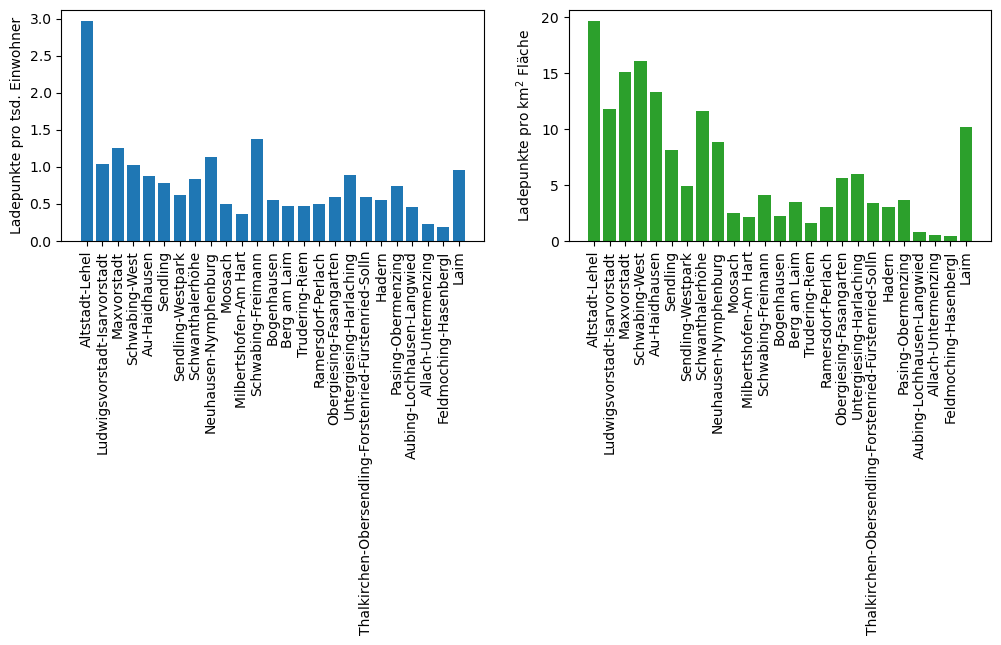

In [92]:
fig, ax = plt.subplots(1,2,figsize=(12,3))
ax[0].bar(df_els_merge["Bezirksname"], df_els_merge["Punkte_tsd_Einw"])
ax[1].bar(df_els_merge["Bezirksname"], df_els_merge["Punkte_Fläche"], color="C2")
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_ylabel("Ladepunkte pro tsd. Einwohner")
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_ylabel("Ladepunkte pro km$^2$ Fläche")
plt. tight_layout()
plt.show()

C:\Users\gammer\AppData\Local\Temp\ipykernel_9544\1619752404.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt. tight_layout()


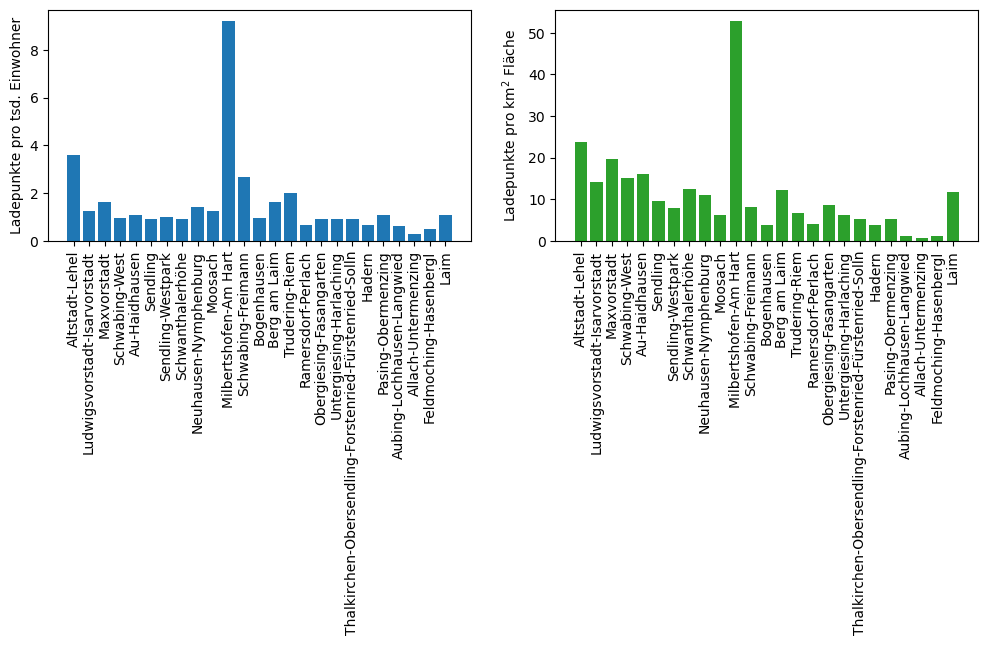

In [91]:
fig, ax = plt.subplots(1,2,figsize=(12,3))
ax[0].bar(df_BNA_merge["Bezirksname"], df_BNA_merge["Punkte_tsd_Einw"])
ax[1].bar(df_BNA_merge["Bezirksname"], df_BNA_merge["Punkte_Fläche"], color="C2")
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set_ylabel("Ladepunkte pro tsd. Einwohner")
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set_ylabel("Ladepunkte pro km$^2$ Fläche")
plt. tight_layout()
plt.show()

In [96]:
df_BNA_merge.to_csv("../data/df_BNA_merge.csv")

In [67]:
import plotly.graph_objects as go
import plotly.express as px
import geojson

In [69]:
with open("../data/muc_geojson.geojson") as f:
    gj_muc = geojson.load(f)

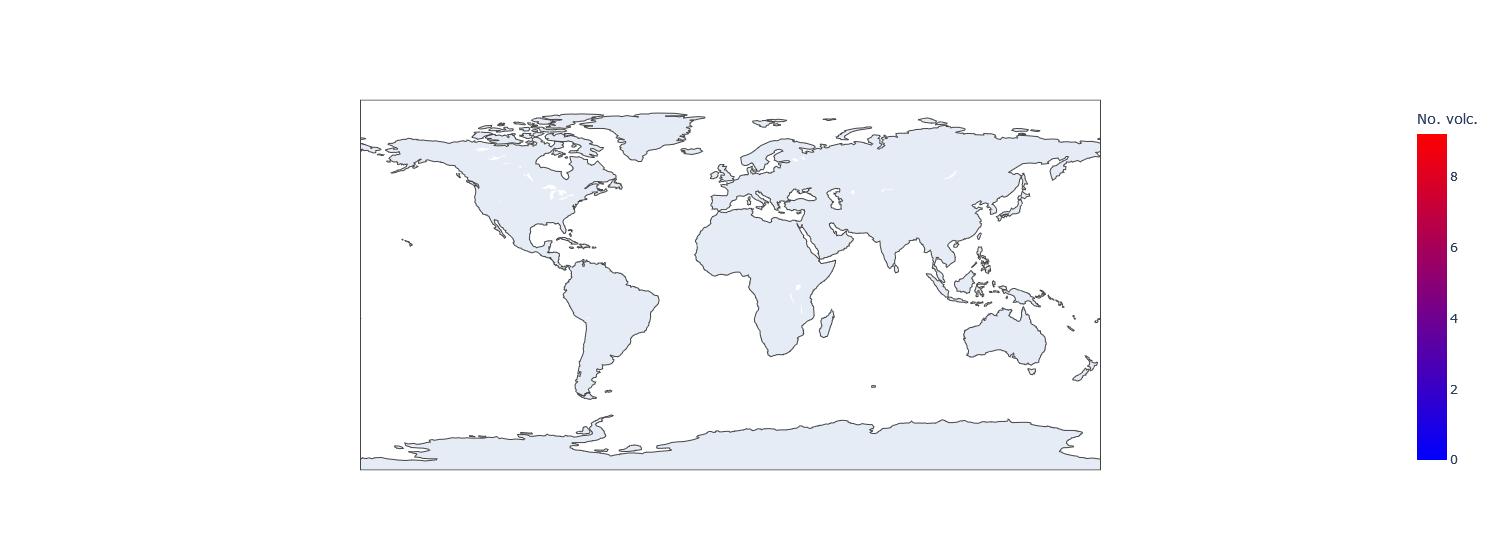

In [95]:
fig7 = go.Figure(go.Choropleth(
                geojson = gj_muc,
                locations=df_BNA_merge["Bezirksname"], 
                z=df_BNA_merge["Punkte_tsd_Einw"], 
                featureidkey="properties.sb_nummer",
                colorscale="Bluered",
                colorbar={"title": 'No. volc.'},
                #text=df_volc_group['Country'],
                zmin=0, zmax=df_BNA_merge["Punkte_tsd_Einw"].max(),
                marker_opacity=0.25,
                #hovertemplate=
                #    "Country: %{text}<br>" +
                #    "Nr. volc.: %{z}<br>" +
                #    "<extra></extra>"

))


fig7.update_layout(
           #mapbox_style="open-street-map",
            #mapbox_zoom=0.75,
            width=1000, height=550,
            #title="Volcanoes of the Earth",
            #title_x=0.5,
            #title_y=0.97,
            #title_font_size=25,
            #margin={"r":0,"t":45,"l":50,"b":0}
            )

#fig7.update_geos(projection_type="orthographic")

fig7.show()